In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pathlib
import tensorflow_hub as hub

In [2]:

train_dir = 'C:/Users/ebrut/Desktop/Son/DatasetOutput2/train'
test_dir = 'C:/Users/ebrut/Desktop/Son/DatasetOutput2/test'
val_dir = 'C:/Users/ebrut/Desktop/Son/DatasetOutput2/val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#load datasets
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        
                                        )

valid_gen = datagen.flow_from_directory(val_dir,
                                        target_size=(224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                    
                                        )

test_gen = datagen.flow_from_directory(test_dir,
                                        target_size=(224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        
                                        )

Found 6036 images belonging to 9 classes.
Found 1723 images belonging to 9 classes.
Found 869 images belonging to 9 classes.


In [8]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [9]:
model_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [10]:
model_layers.trainable = False

In [7]:
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.2),
# ])

In [ ]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(inputs)
# x = model_layers(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs)

In [12]:
model = tf.keras.Sequential([
  model_layers,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(9,activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 9)                 11529     
                                                                 
Total params: 2,269,513
Trainable params: 11,529
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ["accuracy"])

In [15]:
initial_epochs = 20
model_fit = model.fit(train_gen, epochs=initial_epochs, validation_data=valid_gen)

Epoch 1/20


c:\Users\ebrut\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


189/189 [==============================] - 212s 1s/step - loss: 1.4951 - accuracy: 0.4700 - val_loss: 1.1463 - val_accuracy: 0.5914
Epoch 2/20
189/189 [==============================] - 193s 1s/step - loss: 1.1423 - accuracy: 0.5934 - val_loss: 1.0804 - val_accuracy: 0.6158
Epoch 3/20
189/189 [==============================] - 202s 1s/step - loss: 1.0491 - accuracy: 0.6310 - val_loss: 1.0643 - val_accuracy: 0.6239
Epoch 4/20
189/189 [==============================] - 216s 1s/step - loss: 0.9844 - accuracy: 0.6557 - val_loss: 1.0344 - val_accuracy: 0.6349
Epoch 5/20
189/189 [==============================] - 213s 1s/step - loss: 0.9559 - accuracy: 0.6615 - val_loss: 1.0357 - val_accuracy: 0.6268
Epoch 6/20
189/189 [==============================] - 205s 1s/step - loss: 0.9153 - accuracy: 0.6793 - val_loss: 1.0403 - val_accuracy: 0.6344
Epoch 7/20
189/189 [==============================] - 201s 1s/step - loss: 0.8889 - accuracy: 0.6882 - val_loss: 1.0494 - val_accuracy: 0.6384
Epoch 8/20

In [ ]:
model.save("multiclass_mobilenet.h5")

**Test ve analiz**

In [ ]:
loss, accuracy = model.evaluate(test_gen)
print('Test accuracy :', accuracy)

28/28 [==============================] - 27s 953ms/step - loss: 0.9176 - accuracy: 0.6881
Test accuracy : 0.6881473064422607


In [17]:
classes = ['kadin-tisort', 'elbise', 'kadin-bluz', 'kadin-gomlek', 'kadin-ceket', 'kadin-kazak', 'kadin-hirka', 'kadin-sweatshirt', 'kadin-mont-kaban']

C:\Users\ebrut\AppData\Local\Temp\ipykernel_3744\3374749834.py:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = neural_net.predict_generator(test_gen)


Confusion Matrix
Normalized confusion matrix
Classification Report
                  precision    recall  f1-score   support

          elbise       0.09      0.11      0.10        98
      kadin-bluz       0.10      0.07      0.08        98
     kadin-ceket       0.12      0.11      0.11       101
    kadin-gomlek       0.13      0.19      0.15        99
     kadin-hirka       0.02      0.01      0.02        78
     kadin-kazak       0.11      0.13      0.12       102
kadin-mont-kaban       0.14      0.12      0.13       100
kadin-sweatshirt       0.11      0.11      0.11        92
    kadin-tisort       0.13      0.13      0.13       101

        accuracy                           0.11       869
       macro avg       0.11      0.11      0.11       869
    weighted avg       0.11      0.11      0.11       869



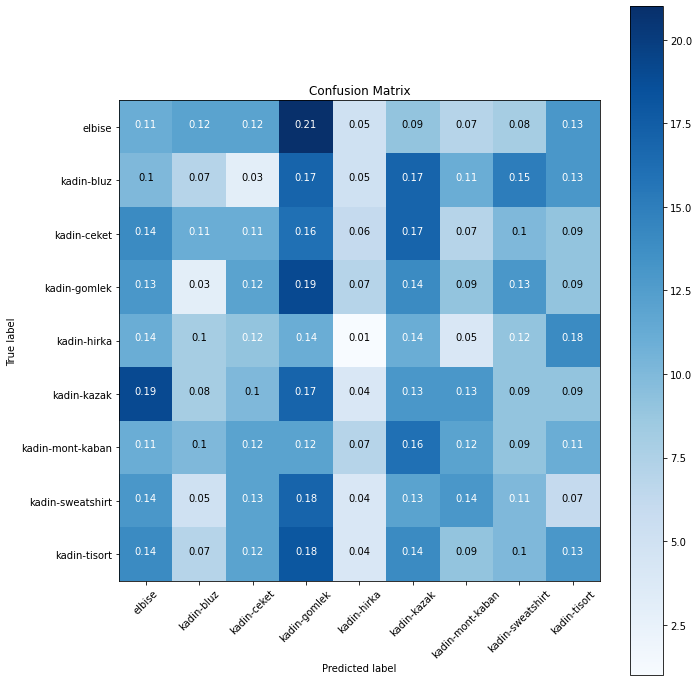

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix 
import itertools 
#shuffle=False
target_names = []

for key in train_gen.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

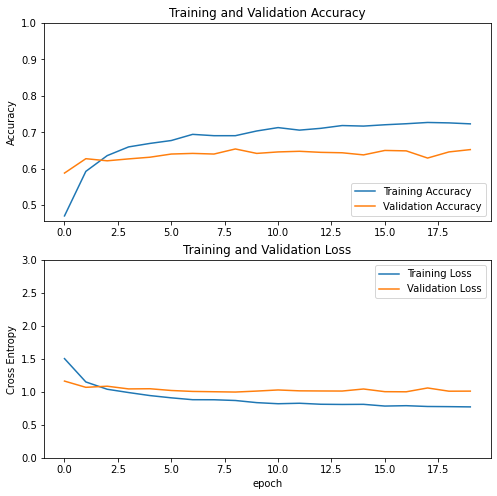

In [ ]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(model.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 100

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in model.layers[:fine_tune_at]:
#   layer.trainable = False

In [ ]:
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
#               metrics=['accuracy'])

In [ ]:
# fine_tune_epochs = 10
# total_epochs =  initial_epochs + fine_tune_epochs

# history_fine = model.fit(train_gen,
#                          epochs=total_epochs,
#                          initial_epoch=history.epoch[-1],
#                          validation_data=valid_gen)

**Giysi görüntüsü ile test**

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [56]:
image = load_img("kadin_kazak.webp", target_size=(224,224))
image = img_to_array(image) / 255 # 0-255 -> 0-1
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 224, 224, 3)


In [57]:
preds = neural_net.predict(image)

1/1 [==============================] - 0s 149ms/step


In [58]:
preds

array([[0.00169827, 0.18276282, 0.0151164 , 0.00847831, 0.09267692,
        0.67873853, 0.00076042, 0.01441456, 0.0053538 ]], dtype=float32)

In [59]:
preds.argmax()

5

In [60]:
classes[preds.argmax()]

'kadin-kazak'